ЗАДАЧА 1:
1. Реализовать неявный метод Эйлера  и явный метод Р-К третьего порядка для решения з.Коши для системы ОДУ с произвольной правой частью.
2. Подобрать в качестве примера ЖС ОДУ  и продемонстрировать работоспособность метода на нем.
3. Построить график зависимости порядка метода p (полученного численно) от шага сетки для каждого из методов.

ЗАДАЧА 2:
1. Численно со вторым порядком точности решить краевую задачу 
$$
\epsilon u''(x) - u'(x) = -1, u(0) = 1, u(1) = 3.
$$
при $\epsilon = 0.3; 0.01$ и $h = 1/10;1/25;1/100$. Объяснить поведение решения.
2. Решить ту же самую задачу методом стрельбы.

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [187]:
a = 0.0
b = 20.0
h = 0.5

j = int((b-a)//h)
x=np.zeros(j)
u=np.zeros(j)
L=np.zeros(j)
u[0] = y(a)

#here we define u(x)
def y (x):
    rez = 10*x**2 - 5*x + 7
    return rez

#here we define f=du/dx
def f (x, y):
    rez = 20*x-5
    return rez

In [199]:
def NonNobisDomenie (x, y, h):
    u = y + h * f(x + h, y) #+O(h^2)
    return u

In [200]:
for i in range (j-1):
    x[i] = a + i*h
    u[i+1]= NonNobisDomenie (x[i], u[i], h)
    #Now counting difference just to know error of our method
    L[i]=y(x[i]+h)-u[i+1]
    print (i,  x[i], u[i], L[i])

    

0 0.0 7.0 -2.5
1 0.5 9.5 -5.0
2 1.0 17.0 -7.5
3 1.5 29.5 -10.0
4 2.0 47.0 -12.5
5 2.5 69.5 -15.0
6 3.0 97.0 -17.5
7 3.5 129.5 -20.0
8 4.0 167.0 -22.5
9 4.5 209.5 -25.0
10 5.0 257.0 -27.5
11 5.5 309.5 -30.0
12 6.0 367.0 -32.5
13 6.5 429.5 -35.0
14 7.0 497.0 -37.5
15 7.5 569.5 -40.0
16 8.0 647.0 -42.5
17 8.5 729.5 -45.0
18 9.0 817.0 -47.5
19 9.5 909.5 -50.0
20 10.0 1007.0 -52.5
21 10.5 1109.5 -55.0
22 11.0 1217.0 -57.5
23 11.5 1329.5 -60.0
24 12.0 1447.0 -62.5
25 12.5 1569.5 -65.0
26 13.0 1697.0 -67.5
27 13.5 1829.5 -70.0
28 14.0 1967.0 -72.5
29 14.5 2109.5 -75.0
30 15.0 2257.0 -77.5
31 15.5 2409.5 -80.0
32 16.0 2567.0 -82.5
33 16.5 2729.5 -85.0
34 17.0 2897.0 -87.5
35 17.5 3069.5 -90.0
36 18.0 3247.0 -92.5
37 18.5 3429.5 -95.0
38 19.0 3617.0 -97.5


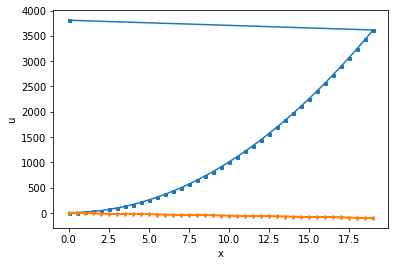

In [190]:
plt.figure(1)
plt.xlabel('x')
plt.ylabel('u')
#plt.ylabel('L')
plt.plot(x, u, marker="s",  markersize=3)
plt.plot(x, L, marker="d",  markersize=3)

In [191]:






#Метод Рунге-Кутты






In [204]:
A = np.array ([[0, 0, 0, 0],
            [1/2, 1/2, 0, 0],
            [1, 0, 1, 0],
            [0, 1/6, 2/3, 1/6]])

x[0] = a
u[0] = y(a)

def Runge (x, y, h):
    k1 = f(x, y)
    k2 = f(x+A[1][0]*h, y+h*A[1][1]*k1)
    k3 = f(x+A[2][0]*h, y+h*(A[2][1]*k1+A[2][2]*k2))
    y_next = y + h*(A[3][1]*k1+A[3][2]*k2+A[3][3]*k3)
    return y_next


In [205]:
for i in range (j-1):
    x[i] = a+h*i
    u[i+1] = Runge(x[i], u[i], h)
    L[i] = y(x[i]+h) - u[i+1]
    print (i, x[i], u[i], L[i])

0 0.0 7.0 0.0
1 0.5 7.0 0.0
2 1.0 12.0 0.0
3 1.5 22.0 0.0
4 2.0 37.0 0.0
5 2.5 57.0 0.0
6 3.0 82.0 0.0
7 3.5 112.0 0.0
8 4.0 147.0 0.0
9 4.5 187.0 0.0
10 5.0 232.0 0.0
11 5.5 282.0 0.0
12 6.0 337.0 0.0
13 6.5 397.0 0.0
14 7.0 462.0 0.0
15 7.5 532.0 0.0
16 8.0 607.0 0.0
17 8.5 687.0 0.0
18 9.0 772.0 0.0
19 9.5 862.0 0.0
20 10.0 957.0 0.0
21 10.5 1057.0 0.0
22 11.0 1162.0 0.0
23 11.5 1272.0 0.0
24 12.0 1387.0 0.0
25 12.5 1507.0 0.0
26 13.0 1632.0 0.0
27 13.5 1762.0 0.0
28 14.0 1897.0 0.0
29 14.5 2037.0 0.0
30 15.0 2182.0 0.0
31 15.5 2332.0 0.0
32 16.0 2487.0 0.0
33 16.5 2647.0 0.0
34 17.0 2812.0 0.0
35 17.5 2982.0 0.0
36 18.0 3157.0 0.0
37 18.5 3337.0 0.0
38 19.0 3522.0 0.0


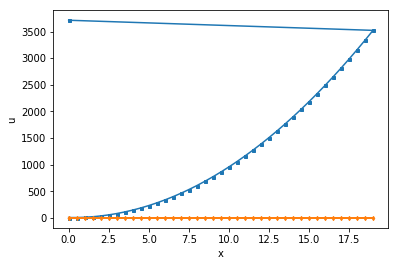

In [203]:
plt.figure(2)
plt.xlabel('x')
plt.ylabel('u')
#plt.ylabel('L')
plt.plot(x, u, marker="s",  markersize=3)
plt.plot(x, L, marker="d",  markersize=3)

In [207]:



#TASK 2




In [ ]:
#Численно со вторым порядком точности решить краевую задачу
#ϵu″(x)−u′(x)=−1,u(0)=1,u(1)=3.
 
#при  ϵ=0.3;0.01  и  h=1/10;1/25;1/100. Объяснить поведение решения.
#Решить ту же самую задачу методом стрельбы.

In [291]:
a = 0
b = 1
h = 1/100
m = int ((b-a)/h)+2
e = 0.3
A = np.zeros ((m, m))
F = np.ones (m)
U = np.zeros (m)
x = np.zeros (m)
F*=(-1)

F[0] = 1
F[m-1] = 3

A[0][0] = 1
A[m-1][m-1] = 1

for i in range (1,m-1):
        A[i][i-1] = e/h**2 + 1/2/h
        A[i][i] = -e*2 / h**2
        A[i][i+1] = e/h**2 - 1/2/h
        x[i] = a + i*h


U = np.dot(np.linalg.inv(A), F)
#U = np.linalg.solve (A,F)
print(U)

#F1 = np.zeros (m)
#F1 = np.dot (A, U)
#print (F1)


[1.         1.01119894 1.02243852 1.03372013 1.04504518 1.05641514
 1.06783154 1.07929596 1.09081002 1.1023754  1.11399385 1.12566716
 1.13739719 1.14918586 1.16103517 1.17294717 1.18492398 1.19696781
 1.20908091 1.22126564 1.23352444 1.2458598  1.25827433 1.2707707
 1.2833517  1.29602019 1.30877914 1.32163161 1.33458078 1.34762992
 1.36078241 1.37404178 1.38741163 1.40089571 1.41449789 1.42822219
 1.44207273 1.45605379 1.47016981 1.48442536 1.49882516 1.51337411
 1.52807725 1.54293983 1.55796724 1.57316507 1.5885391  1.6040953
 1.61983984 1.63577912 1.65191972 1.66826849 1.68483246 1.70161894
 1.71863548 1.73588986 1.75339015 1.77114469 1.7891621  1.80745128
 1.82602145 1.84488213 1.86404318 1.88351477 1.90330743 1.92343205
 1.94389988 1.96472254 1.98591208 2.00748092 2.02944193 2.05180839
 2.07459406 2.09781314 2.12148032 2.1456108  2.17022027 2.19532499
 2.22094172 2.24708784 2.27378129 2.30104061 2.328885   2.35733428
 2.38640896 2.41613023 2.44652003 2.47760101 2.50939659 2.541931

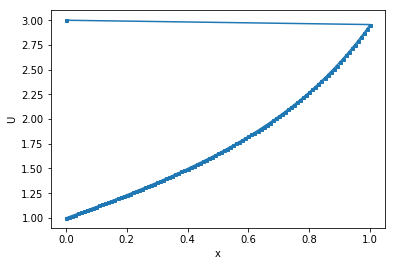

In [292]:
plt.figure(3)
plt.xlabel('x')
plt.ylabel('U')
plt.plot(x, U, marker="s",  markersize=3)

In [ ]:
#Метод стрельбы

In [297]:
a = 0
b = 1
h = 1/100
m = int ((b-a)/h)+1
e = 0.3
t = np.zeros(m)
Y = np.ones ((3, m))
Y[1][0] = 0
Y[0][1] += h
Y[1][1] = h
for i in range (1, m-1):
    t[i] = i*h
    Y[0][i+1] = (2*e/h**2 * Y[0][i] - (e/h**2+1/2/h)*Y[0][i-1] - 1)/(e/h**2-1/2/h)
    Y[1][i+1] = 2* h/e * Y[0][i]- Y[0][i-1]-2*h/e
    
t[m-1] = (m-1)*h
for i in range (m):
    Y[2][i] = Y[0][i] + ((3-Y[0][m-1])/Y[1][m-1])*Y[1][i]
    

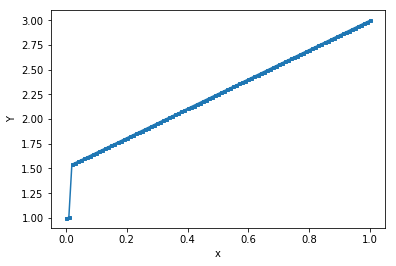

In [299]:
plt.figure(4)
plt.xlabel('x')
plt.ylabel('Y')
plt.plot(t, Y[2], marker="s",  markersize=3)